In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import get_line, set_color, set_plot
from run_train import TrainArgs, train

cc = np.concatenate

### Regression test data

In [2]:
args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=2, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/rgr",
    problem_type='rgr', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.1, ssm_lr_base=0.01, ssm_size_base=64,
    warmup_end=1, weight_decay=0.05)

train(args)

2023-11-02 16:32:22.520253: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 10200547328
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


[*] Setting Randomness...
[*] Generating Fly Courtship Regression Dataset


/home/rp21/.conda/envs/s5-gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 1565/1565 [00:00<00:00, 456695.59 examples/s]


Fly song vocab size: 6
[*] Starting S5 rgr training on `fly_mini/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)


/scratch/gpfs/rp21/s5_test/S5-regression/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using linear warmup for epoch 1


 21%|██        | 40/195 [00:49<03:10,  1.23s/it]


KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5), tight_layout=True)

train_losses = []
val_losses = []
r_vals = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    preds = data['val_pred']
    targs = data['val_targ']

    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
    ax.scatter(preds, targs, c='k', s=5)
    
    x_line, y_line, (slp, icpt, r, p_val, stderr) = get_line(preds, targs)
    r_vals.append(r)
        
    ax.plot(x_line, y_line, c='r')
    set_plot(ax, x_label='Predictions', y_label='Targets', title=f'Epoch {cepoch} (val)\nR = {r:.3f}')
    
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'], loc='center right')
set_plot(ax, x_label='Epoch', y_label='Loss')

ax_r = ax.twinx()
ax_r.plot(r_vals, c='r')
set_plot(ax_r, y_label='R(targ, pred)')
set_color(ax_r, 'r')

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5), tight_layout=True)

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    try:
        preds = cc([pred.flatten() for pred in data['train_pred']])
        targs = cc([targ.flatten() for targ in data['train_targ']])
    except:
        continue

    ax.scatter(preds, targs, c='k', s=1)
    
    x_line, y_line, (slp, icpt, r, p_val, stderr) = get_line(preds, targs)
    
    ax.plot(x_line, y_line, c='r')
    
    set_plot(ax, x_label='Predictions', y_label='Targets', title=f'Epoch {cepoch} (train)\nR = {r:.3f}')

### Scrambled regression test data

In [5]:
args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=2, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/rgr_scrambled",
    problem_type='rgr', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.1, ssm_lr_base=0.01, ssm_size_base=64,
    warmup_end=1, weight_decay=0.05)

train(args)

[*] Setting Randomness...
[*] Generating Fly Courtship Regression Dataset
Clearing cache...


Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 596.71it/s]
Generating train split: 6074 examples [00:00, 435051.87 examples/s]
Generating val split: 1519 examples [00:00, 361627.19 examples/s]
Generating test split: 1519 examples [00:00, 340375.46 examples/s]
Saving the dataset (1/1 shards): 100%|██████████| 1519/1519 [00:00<00:00, 355969.82 examples/s]


Fly song vocab size: 6
[*] Starting S5 rgr training on `fly_mini/rgr_scrambled` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)


/scratch/gpfs/rp21/s5_test/S5-regression/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using linear warmup for epoch 1


100%|██████████| 189/189 [00:11<00:00, 16.17it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 48/48 [00:05<00:00,  8.18it/s]


[*] Running Epoch 1 Test...


100%|██████████| 48/48 [00:00<00:00, 230.06it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 1.15676 -- Val Loss: 0.08424 --Test Loss: 0.08424 -- Val Accuracy: -0.0842 Test Accuracy: -0.0842
	Best Val Loss: 0.08424 -- Best Val Accuracy: -0.0842 at Epoch 1
	Best Test Loss: 0.08424 -- Best Test Accuracy: -0.0842 at Epoch 1

[*] Starting Training Epoch 2...
using cosine annealing for epoch 2


100%|██████████| 189/189 [00:03<00:00, 51.22it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 48/48 [00:00<00:00, 229.04it/s]


[*] Running Epoch 2 Test...


100%|██████████| 48/48 [00:00<00:00, 221.58it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.07916 -- Val Loss: 0.08605 --Test Loss: 0.08605 -- Val Accuracy: -0.0860 Test Accuracy: -0.0860
	Best Val Loss: 0.08424 -- Best Val Accuracy: -0.0842 at Epoch 1
	Best Test Loss: 0.08424 -- Best Test Accuracy: -0.0842 at Epoch 1

[*] Starting Training Epoch 3...
using cosine annealing for epoch 3


100%|██████████| 189/189 [00:03<00:00, 51.14it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 48/48 [00:00<00:00, 228.81it/s]


[*] Running Epoch 3 Test...


100%|██████████| 48/48 [00:00<00:00, 221.66it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.07878 -- Val Loss: 0.08355 --Test Loss: 0.08355 -- Val Accuracy: -0.0835 Test Accuracy: -0.0835
	Best Val Loss: 0.08355 -- Best Val Accuracy: -0.0835 at Epoch 3
	Best Test Loss: 0.08355 -- Best Test Accuracy: -0.0835 at Epoch 3

[*] Starting Training Epoch 4...
using cosine annealing for epoch 4


100%|██████████| 189/189 [00:03<00:00, 50.69it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 48/48 [00:00<00:00, 228.95it/s]


[*] Running Epoch 4 Test...


100%|██████████| 48/48 [00:00<00:00, 221.84it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.07871 -- Val Loss: 0.08468 --Test Loss: 0.08468 -- Val Accuracy: -0.0847 Test Accuracy: -0.0847
	Best Val Loss: 0.08355 -- Best Val Accuracy: -0.0835 at Epoch 3
	Best Test Loss: 0.08355 -- Best Test Accuracy: -0.0835 at Epoch 3

[*] Starting Training Epoch 5...
using cosine annealing for epoch 5


100%|██████████| 189/189 [00:03<00:00, 51.22it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 48/48 [00:00<00:00, 228.97it/s]


[*] Running Epoch 5 Test...


100%|██████████| 48/48 [00:00<00:00, 221.74it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.07860 -- Val Loss: 0.08462 --Test Loss: 0.08462 -- Val Accuracy: -0.0846 Test Accuracy: -0.0846
	Best Val Loss: 0.08355 -- Best Val Accuracy: -0.0835 at Epoch 3
	Best Test Loss: 0.08355 -- Best Test Accuracy: -0.0835 at Epoch 3

[*] Starting Training Epoch 6...
using cosine annealing for epoch 6


100%|██████████| 189/189 [00:03<00:00, 51.23it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 48/48 [00:00<00:00, 228.68it/s]


[*] Running Epoch 6 Test...


100%|██████████| 48/48 [00:00<00:00, 221.87it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.07855 -- Val Loss: 0.08336 --Test Loss: 0.08336 -- Val Accuracy: -0.0834 Test Accuracy: -0.0834
	Best Val Loss: 0.08336 -- Best Val Accuracy: -0.0834 at Epoch 6
	Best Test Loss: 0.08336 -- Best Test Accuracy: -0.0834 at Epoch 6

[*] Starting Training Epoch 7...
using cosine annealing for epoch 7


100%|██████████| 189/189 [00:03<00:00, 51.26it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 48/48 [00:00<00:00, 229.15it/s]


[*] Running Epoch 7 Test...


100%|██████████| 48/48 [00:00<00:00, 222.37it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.07848 -- Val Loss: 0.08404 --Test Loss: 0.08404 -- Val Accuracy: -0.0840 Test Accuracy: -0.0840
	Best Val Loss: 0.08336 -- Best Val Accuracy: -0.0834 at Epoch 6
	Best Test Loss: 0.08336 -- Best Test Accuracy: -0.0834 at Epoch 6

[*] Starting Training Epoch 8...
using cosine annealing for epoch 8


100%|██████████| 189/189 [00:03<00:00, 51.22it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 48/48 [00:00<00:00, 229.62it/s]


[*] Running Epoch 8 Test...


100%|██████████| 48/48 [00:00<00:00, 223.12it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.07844 -- Val Loss: 0.08361 --Test Loss: 0.08361 -- Val Accuracy: -0.0836 Test Accuracy: -0.0836
	Best Val Loss: 0.08336 -- Best Val Accuracy: -0.0834 at Epoch 6
	Best Test Loss: 0.08336 -- Best Test Accuracy: -0.0834 at Epoch 6

[*] Starting Training Epoch 9...
using cosine annealing for epoch 9


100%|██████████| 189/189 [00:03<00:00, 51.09it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 48/48 [00:00<00:00, 229.02it/s]


[*] Running Epoch 9 Test...


100%|██████████| 48/48 [00:00<00:00, 221.47it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.07829 -- Val Loss: 0.08392 --Test Loss: 0.08392 -- Val Accuracy: -0.0839 Test Accuracy: -0.0839
	Best Val Loss: 0.08336 -- Best Val Accuracy: -0.0834 at Epoch 6
	Best Test Loss: 0.08336 -- Best Test Accuracy: -0.0834 at Epoch 6

[*] Starting Training Epoch 10...
using cosine annealing for epoch 10


100%|██████████| 189/189 [00:03<00:00, 51.12it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 48/48 [00:00<00:00, 229.10it/s]


[*] Running Epoch 10 Test...


100%|██████████| 48/48 [00:00<00:00, 222.25it/s]


=>> Epoch 10 Metrics ===
	Train Loss: 0.07834 -- Val Loss: 0.08388 --Test Loss: 0.08388 -- Val Accuracy: -0.0839 Test Accuracy: -0.0839
	Best Val Loss: 0.08336 -- Best Val Accuracy: -0.0834 at Epoch 6
	Best Test Loss: 0.08336 -- Best Test Accuracy: -0.0834 at Epoch 6



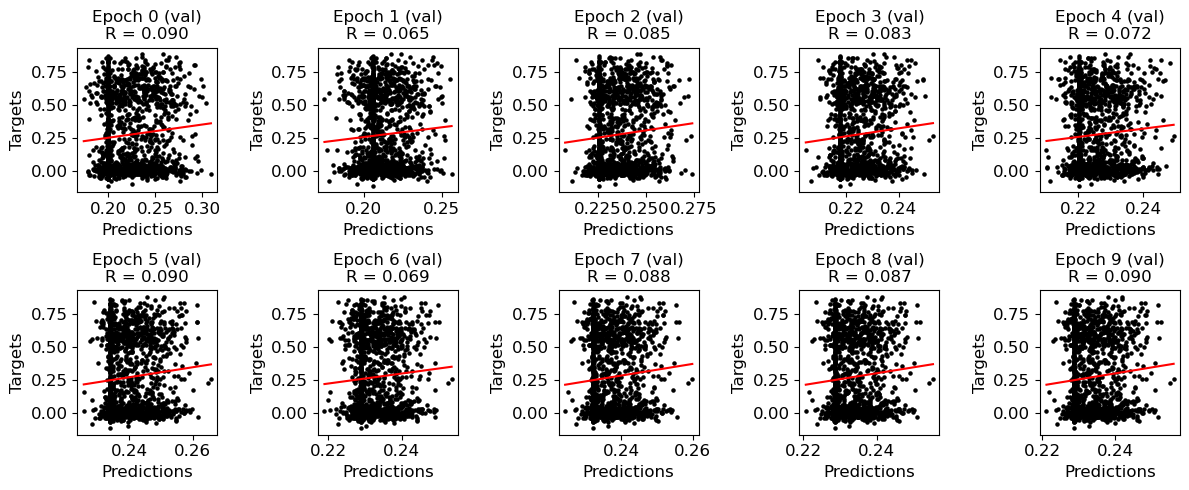

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5), tight_layout=True)

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    preds = data['val_pred']
    targs = data['val_targ']

    ax.scatter(preds, targs, c='k', s=5)
    
    x_line, y_line, (slp, icpt, r, p_val, stderr) = get_line(preds, targs)
    
    ax.plot(x_line, y_line, c='r')
    
    set_plot(ax, x_label='Predictions', y_label='Targets', title=f'Epoch {cepoch} (val)\nR = {r:.3f}')

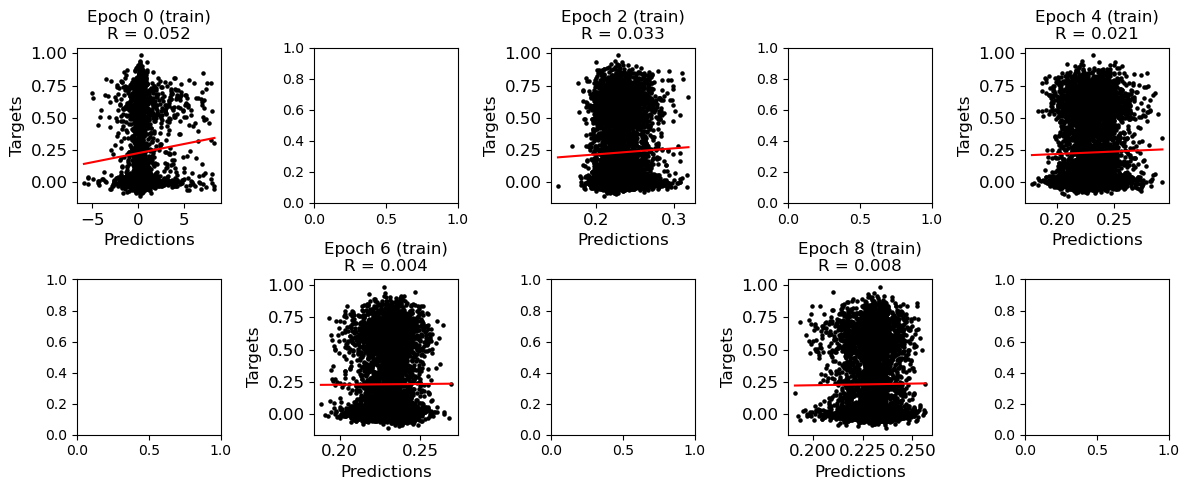

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5), tight_layout=True)

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    try:
        preds = cc([pred.flatten() for pred in data['train_pred']])
        targs = cc([targ.flatten() for targ in data['train_targ']])
    except:
        continue

    ax.scatter(preds, targs, c='k', s=5)
    
    x_line, y_line, (slp, icpt, r, p_val, stderr) = get_line(preds, targs)
    
    ax.plot(x_line, y_line, c='r')
    
    set_plot(ax, x_label='Predictions', y_label='Targets', title=f'Epoch {cepoch} (train)\nR = {r:.3f}')